# Hoja de Trabajo 1: Experimentación con Redes Neuronales

## Introducción
Este ejercicio tiene como objetivo profundizar en la comprensión de las redes neuronales mediante la experimentación. A través de variaciones en la arquitectura y parámetros, se busca entender cómo se comporta y aprende una red neuronal. Utilizaremos el dataset "Heart Disease" disponible en el UCI Machine Learning Repository.

## Dataset "Heart Disease"
Puedes descargar el dataset directamente desde el siguiente enlace:
http://archive.ics.uci.edu/dataset/45/heart+disease. Recuerda que vamos a estar utilizando CRISP-DM para crear los modelos. El primer paso es comprender los datos. Ese link te proporciona la información necesaria para entender el dataset. Las columnas y el rol que cada columna va a jugar en tu modelo (variables independientes y dependiente). Como menciona la documentación, utiliza solo la base de datos de Cleveland.

## Sección 1: Preparación de Datos
* Descarga y carga el dataset "Heart Disease".
* Realiza un breve análisis exploratorio: ¿Qué tipo de datos contiene? ¿Cuántos ejemplos hay?. 
* Procesa el dataset: normaliza o estandariza si es necesario, divide el dataset en conjuntos de entrenamiento y prueba.

Nuestro enfoque de hoy no es un mega modelo sino comprender mejor como se comportan las redes neuronales. Realiza lo necesario pero nada muy extravagante.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard

# Cargar los datos
data = pd.read_csv('pcleveland.txt', sep=',')


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import to_categorical

# Replace '?' with NaN
data.replace('?', pd.NA, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Divide the dataset into features (X) and target labels (y)
X = data.drop('num', axis=1)
y = data['num']

# Encode the labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  num       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


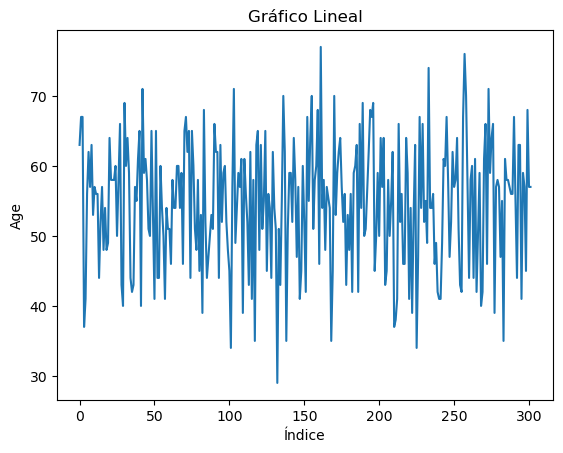

In [6]:
import matplotlib.pyplot as plt

plt.plot(data['age'])

plt.title('Gráfico Lineal')
plt.xlabel('Índice')
plt.ylabel('Age')
plt.show()


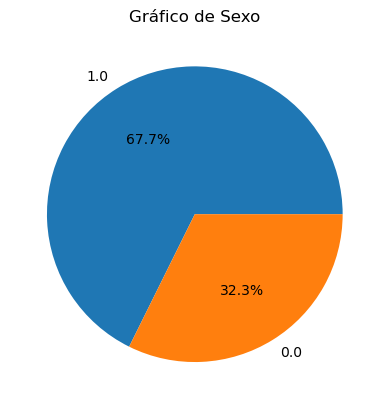

In [7]:
conteo = data['sex'].value_counts()

# Crear el gráfico de pie
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%')

plt.title('Gráfico de Sexo')
plt.show()

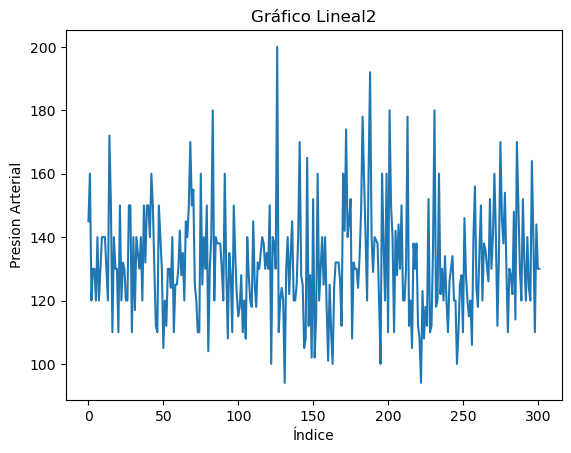

In [8]:
plt.plot(data['trestbps'])

plt.title('Gráfico Lineal2')
plt.xlabel('Índice')
plt.ylabel('Presion Arterial')
plt.show()


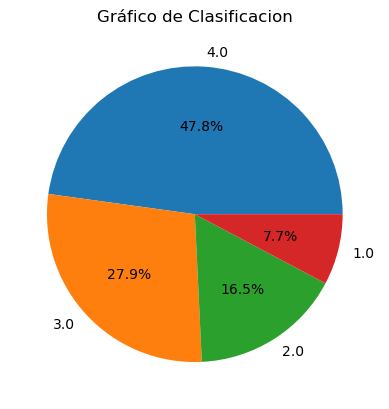

In [9]:
conteo1 = data['cp'].value_counts()

# Crear el gráfico de pie
plt.pie(conteo1, labels=conteo1.index, autopct='%1.1f%%')

plt.title('Gráfico de Clasificacion')
plt.show()

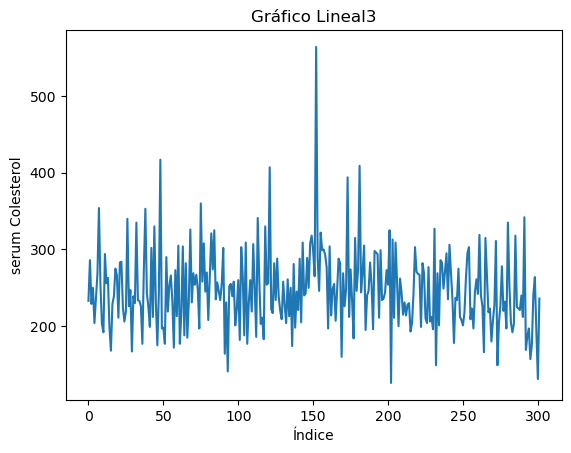

In [10]:
plt.plot(data['chol'])

plt.title('Gráfico Lineal3')
plt.xlabel('Índice')
plt.ylabel('serum Colesterol')
plt.show()

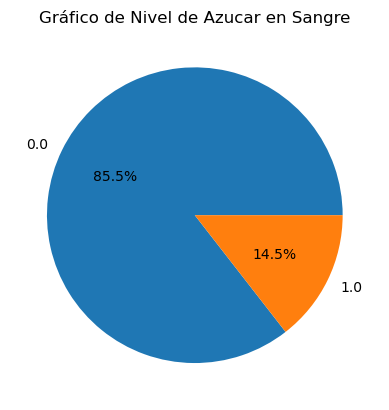

In [11]:
conteo3 = data['fbs'].value_counts()

# Crear el gráfico de pie
plt.pie(conteo3, labels=conteo3.index, autopct='%1.1f%%')

plt.title('Gráfico de Nivel de Azucar en Sangre')
plt.show()

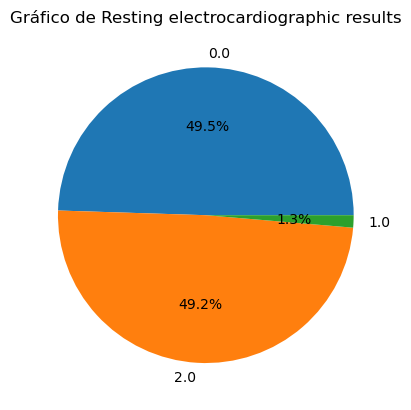

In [12]:
conteo4 = data['restecg'].value_counts()

# Crear el gráfico de pie
plt.pie(conteo4, labels=conteo4.index, autopct='%1.1f%%')

plt.title('Gráfico de Resting electrocardiographic results')
plt.show()

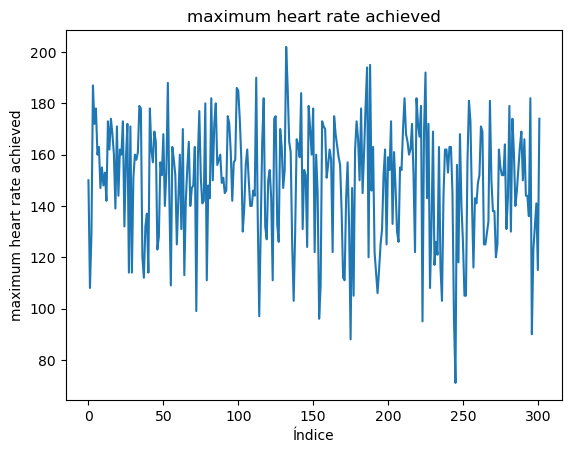

In [13]:
plt.plot(data['thalach'])

plt.title('maximum heart rate achieved')
plt.xlabel('Índice')
plt.ylabel('maximum heart rate achieved')
plt.show()

#presencia de OUTLIERS

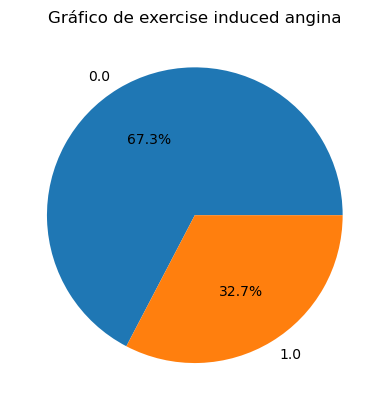

In [14]:
conteo5 = data['exang'].value_counts()

# Crear el gráfico de pie
plt.pie(conteo5, labels=conteo5.index, autopct='%1.1f%%')

plt.title('Gráfico de exercise induced angina')
plt.show()

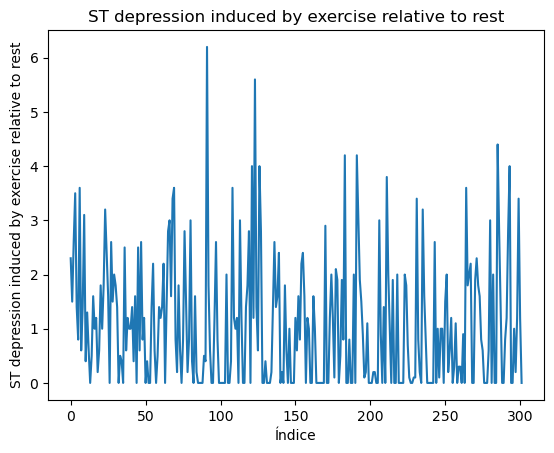

In [15]:
plt.plot(data['oldpeak'])

plt.title('ST depression induced by exercise relative to rest')
plt.xlabel('Índice')
plt.ylabel('ST depression induced by exercise relative to rest')
plt.show()

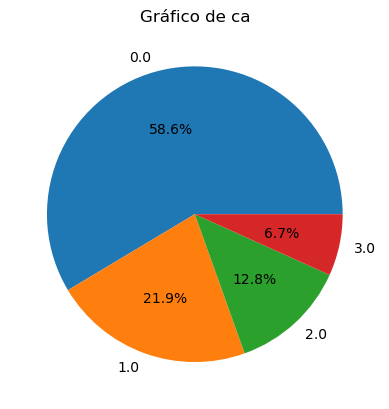

In [16]:
conteo6 = data['ca'].value_counts()

# Crear el gráfico de pie
plt.pie(conteo6, labels=conteo6.index, autopct='%1.1f%%')

plt.title('Gráfico de ca')
plt.show()

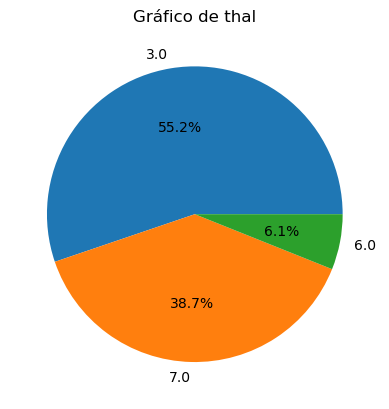

In [17]:
conteo7 = data['thal'].value_counts()

# Crear el gráfico de pie
plt.pie(conteo7, labels=conteo7.index, autopct='%1.1f%%')

plt.title('Gráfico de thal')
plt.show()

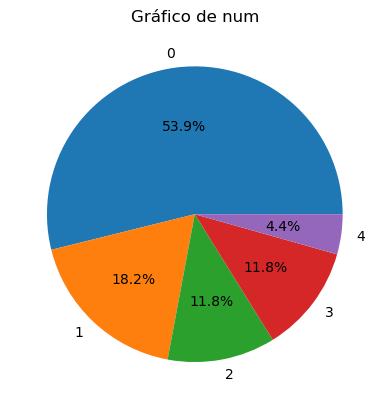

In [18]:
conteo8 = data['num'].value_counts()

# Crear el gráfico de pie
plt.pie(conteo8, labels=conteo8.index, autopct='%1.1f%%')

plt.title('Gráfico de num')
plt.show()

## Sección 2: Construcción de la Red Neuronal

Construye una red neuronal básica utilizando Keras.

* Define la arquitectura: número de capas, neuronas por capa, función de activación.
* Compila el modelo especificando la función de pérdida, el optimizador y métricas adicionales.
* Realiza una breve descripción escrita de la arquitectura que has definido.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import to_categorical

# Split the data into training and test sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train_encoded, num_classes=5)
y_test_onehot = to_categorical(y_test_encoded, num_classes=5)

# Verify the dimensions of the datasets
print("Dimensions of X_train_normalized:", X_train_normalized.shape)
print("Dimensions of y_train_onehot:", y_train_onehot.shape)
print("Dimensions of X_test_normalized:", X_test_normalized.shape)
print("Dimensions of y_test_onehot:", y_test_onehot.shape)



Dimensions of X_train_normalized: (237, 13)
Dimensions of y_train_onehot: (237, 5)
Dimensions of X_test_normalized: (60, 13)
Dimensions of y_test_onehot: (60, 5)


## Sección 3: Experimentación

Utiliza ciclos para las siguientes pruebas. Debes entrenar varios modelos variando el parámetro indicado en cada inciso según el rango y paso proporcionado. Recuerda almacenar tus resultados porque te servirán en la siguiente sección.

### Variabilidad en Capas Ocultas:

Las redes con demasiadas capas pueden tardar mucho tiempo en entrenarse, especialmente si no se dispone de un hardware adecuado.

* Rango: Entre 1 y 10 capas.
* Paso: 1 capa.
* Nota: En muchos problemas, incluso 2-3 capas son suficientes para obtener buenos resultados. Por encima de eso, a veces se necesita una arquitectura especializada o un problema muy complejo para justificar más capas.

In [25]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Función para crear el modelo con una cantidad específica de capas y neuronas
def create_model(num_layers, num_neurons):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=13, activation='relu'))
    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(5, activation='softmax'))  # Adjusted to 5 classes
    return model

# Rango de capas (incremento de 1 capa)
min_layers = 1
max_layers = 10

layers_list = np.arange(min_layers, max_layers + 1, step=1)
neurons_list = np.arange(1, 11)  # Neurons range: 1 to 10

# TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')

# Training loop
for layers in layers_list:
    for neurons in neurons_list:
        print(f"Training model with {layers} layers and {neurons} neurons...")
        model = create_model(layers, neurons)
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        y_train_int = y_train_encoded.astype(int)
        y_train_onehot = to_categorical(y_train_int, num_classes=5)

        model.fit(X_train_normalized, y_train_onehot, epochs=2, batch_size=2, callbacks=[tensorboard_callback])
        print(f"Model with {layers} layers and {neurons} neurons trained.")

print("All models trained.")



Training model with 1 layers and 1 neurons...
Epoch 1/2
119/119 [==============================] - 2s 4ms/step - loss: 1.5754 - accuracy: 0.3713
Epoch 2/2
119/119 [==============================] - 0s 4ms/step - loss: 1.4739 - accuracy: 0.5190
Model with 1 layers and 1 neurons trained.
Training model with 1 layers and 2 neurons...
Epoch 1/2
119/119 [==============================] - 1s 4ms/step - loss: 1.6480 - accuracy: 0.5063
Epoch 2/2
119/119 [==============================] - 0s 3ms/step - loss: 1.5291 - accuracy: 0.5232
Model with 1 layers and 2 neurons trained.
Training model with 1 layers and 3 neurons...
Epoch 1/2
119/119 [==============================] - 2s 4ms/step - loss: 1.6070 - accuracy: 0.4388
Epoch 2/2
119/119 [==============================] - 0s 4ms/step - loss: 1.5565 - accuracy: 0.4895
Model with 1 layers and 3 neurons trained.
Training model with 1 layers and 4 neurons...
Epoch 1/2
119/119 [==============================] - 1s 3ms/step - loss: 1.5719 - accuracy: 0

### Variabilidad en Neuronas:

El número de neuronas por capa influye en la capacidad de la red. Sin embargo, demasiadas neuronas pueden hacer que el entrenamiento sea más lento y puede causar sobreajuste.

* Rango: Entre 10 y 1000 neuronas.
* Paso: Incremento logarítmico

In [40]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

accuracy_results1 = []
loss_results1 = []

# Función para crear el modelo con una cantidad específica de capas y neuronas
def create_model(num_layers, num_neurons):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=13, activation='relu'))
    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(5, activation='softmax'))  # Adjusted to 5 classes
    return model

# Rango de capas (incremento de 1 capa)
min_layers = 1
max_layers = 2

# Rango de neuronas por capa (incremento logarítmico)
min_neurons = 10
max_neurons = 1000
num_points = 10
neurons_list = np.logspace(np.log10(min_neurons), np.log10(max_neurons), num=num_points, dtype=int)

layers_list = np.arange(min_layers, max_layers + 1, step=1)
# TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')

# Training loop
for layers in layers_list:
    for neurons in neurons_list:
        print(f"Training model with {layers} layers and {neurons} neurons...")
        model = create_model(layers, neurons)
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        # Convertir etiquetas a one-hot encoding
        y_train_int = y_train_encoded.astype(int)  # Convierte las etiquetas a números enteros
        y_train_onehot = to_categorical(y_train_int, num_classes=5)  # Corrected to 5 classes

        model.fit(X_train_normalized, y_train_onehot, epochs=1, batch_size=1, callbacks=[tensorboard_callback])
        print(f"Model with {layers} layers and {neurons} neurons trained.")

        accuracy_results1.append(history.history['accuracy'][-1])
        loss_results1.append(history.history['loss'][-1])

print("All models trained.")


Training model with 1 layers and 10 neurons...
237/237 [==============================] - 2s 3ms/step - loss: 1.5146 - accuracy: 0.3882
Model with 1 layers and 10 neurons trained.
Training model with 1 layers and 16 neurons...
237/237 [==============================] - 2s 3ms/step - loss: 1.2673 - accuracy: 0.5274
Model with 1 layers and 16 neurons trained.
Training model with 1 layers and 27 neurons...
237/237 [==============================] - 2s 3ms/step - loss: 1.3513 - accuracy: 0.4473
Model with 1 layers and 27 neurons trained.
Training model with 1 layers and 46 neurons...
237/237 [==============================] - 2s 3ms/step - loss: 1.2741 - accuracy: 0.5190
Model with 1 layers and 46 neurons trained.
Training model with 1 layers and 77 neurons...
237/237 [==============================] - 2s 3ms/step - loss: 1.3155 - accuracy: 0.4684
Model with 1 layers and 77 neurons trained.
Training model with 1 layers and 129 neurons...
237/237 [==============================] - 2s 3ms/st

### Variabilidad en Épocas:

Demasiadas épocas sin una técnica de parada temprana pueden llevar al sobreajuste.

* Rango: Entre 10 y 5000 épocas.
* Paso: Incremento logarítmico

In [39]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

accuracy_results2 = []
loss_results2 = []

# Función para crear el modelo con una cantidad específica de capas y neuronas
def create_model(num_layers, num_neurons):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=13, activation='relu'))
    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(5, activation='softmax'))  # Adjusted to 5 classes
    return model

# Rango de capas (incremento de 1 capa)
min_layers = 1
max_layers = 1

# Rango de neuronas por capa (incremento logarítmico)
min_neurons = 2
max_neurons = 2
num_neurons_points = 1
neurons_list = np.logspace(np.log10(min_neurons), np.log10(max_neurons), num=num_neurons_points, dtype=int)

# Rango de épocas (incremento logarítmico) lo deje en 500 porque se tardaba mucho
min_epochs = 10
max_epochs = 500
num_epochs_points = 3
epochs_list = np.logspace(np.log10(min_epochs), np.log10(max_epochs), num=num_epochs_points, dtype=int)

layers_list = np.arange(min_layers, max_layers + 1, step=1)
# TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')

# Training loop
for layers in layers_list:
    for neurons in neurons_list:
        for epochs in epochs_list:
            print(f"Training model with {layers} layers, {neurons} neurons, and {epochs} epochs...")
            model = create_model(layers, neurons)
            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
            
            # Convertir etiquetas a one-hot encoding
            y_train_int = y_train_encoded.astype(int)
            y_train_onehot = to_categorical(y_train_int, num_classes=5)

            history = model.fit(X_train_normalized, y_train_onehot, epochs=epochs, batch_size=10, callbacks=[tensorboard_callback])
            print(f"Model with {layers} layers, {neurons} neurons, and {epochs} epochs trained.")
            
            accuracy_results2.append(history.history['accuracy'][-1])
            loss_results2.append(history.history['loss'][-1])

print("All models trained.")



Training model with 1 layers, 2 neurons, and 10 epochs...
Epoch 1/10
24/24 [==============================] - 1s 12ms/step - loss: 1.6570 - accuracy: 0.2996
Epoch 2/10
24/24 [==============================] - 0s 4ms/step - loss: 1.6230 - accuracy: 0.3376
Epoch 3/10
24/24 [==============================] - 0s 4ms/step - loss: 1.5947 - accuracy: 0.3966
Epoch 4/10
24/24 [==============================] - 0s 9ms/step - loss: 1.5702 - accuracy: 0.4430
Epoch 5/10
24/24 [==============================] - 0s 5ms/step - loss: 1.5483 - accuracy: 0.4852
Epoch 6/10
24/24 [==============================] - 0s 4ms/step - loss: 1.5288 - accuracy: 0.4937
Epoch 7/10
24/24 [==============================] - 0s 4ms/step - loss: 1.5092 - accuracy: 0.5232
Epoch 8/10
24/24 [==============================] - 0s 4ms/step - loss: 1.4883 - accuracy: 0.5232
Epoch 9/10
24/24 [==============================] - 0s 4ms/step - loss: 1.4657 - accuracy: 0.5232
Epoch 10/10
24/24 [==============================] - 0s 4ms

## Tamaño de Batch:

El tamaño del batch influye en la velocidad de entrenamiento y la estabilidad del modelo. Un batch muy grande puede no caber en la memoria, mientras que uno muy pequeño puede hacer que el entrenamiento sea inestable.

* Rango: Entre 1 (Stochastic Gradient Descent) y el tamaño del conjunto de datos (Batch Gradient Descent).
* Paso: Incremento logarítmico

In [38]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

accuracy_results3 = []
loss_results3 = []

# Función para crear el modelo con una cantidad específica de capas y neuronas
def create_model(num_layers, num_neurons):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=13, activation='relu'))
    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(5, activation='softmax'))  # Adjusted to 5 classes
    return model

# Rango de capas (incremento de 1 capa)
min_layers = 1
max_layers = 1

# Rango de neuronas por capa (incremento logarítmico)
min_neurons = 2
max_neurons = 2
num_neurons_points = 1
neurons_list = np.logspace(np.log10(min_neurons), np.log10(max_neurons), num=num_neurons_points, dtype=int)

# Rango de épocas (incremento logarítmico) lo deje en 500 porque se tardaba mucho
min_epochs = 10
max_epochs = 500
num_epochs_points = 3
epochs_list = np.logspace(np.log10(min_epochs), np.log10(max_epochs), num=num_epochs_points, dtype=int)

layers_list = np.arange(min_layers, max_layers + 1, step=1)
# TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs')

# Training loop
for layers in layers_list:
    for neurons in neurons_list:
        for epochs in epochs_list:
            print(f"Training model with {layers} layers, {neurons} neurons, and {epochs} epochs...")
            model = create_model(layers, neurons)
            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
            
            # Convertir etiquetas a one-hot encoding
            y_train_int = y_train_encoded.astype(int)
            y_train_onehot = to_categorical(y_train_int, num_classes=5)

            history = model.fit(X_train_normalized, y_train_onehot, epochs=epochs, batch_size=10, callbacks=[tensorboard_callback])
            print(f"Model with {layers} layers, {neurons} neurons, and {epochs} epochs trained.")
            
            accuracy_results3.append(history.history['accuracy'][-1])
            loss_results3.append(history.history['loss'][-1])

print("All models trained.")





Training model with 1 layers, 2 neurons, and 10 epochs...
Epoch 1/10
24/24 [==============================] - 1s 10ms/step - loss: 1.5605 - accuracy: 0.5232
Epoch 2/10
24/24 [==============================] - 0s 4ms/step - loss: 1.5280 - accuracy: 0.5232
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 1.4967 - accuracy: 0.5232
Epoch 4/10
24/24 [==============================] - 0s 5ms/step - loss: 1.4611 - accuracy: 0.5232
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: 1.4276 - accuracy: 0.5232
Epoch 6/10
24/24 [==============================] - 0s 4ms/step - loss: 1.3937 - accuracy: 0.5232
Epoch 7/10
24/24 [==============================] - 0s 4ms/step - loss: 1.3594 - accuracy: 0.5232
Epoch 8/10
24/24 [==============================] - 0s 4ms/step - loss: 1.3305 - accuracy: 0.5232
Epoch 9/10
24/24 [==============================] - 0s 4ms/step - loss: 1.3006 - accuracy: 0.5232
Epoch 10/10
24/24 [==============================] - 0s 5ms

## Sección 4: Análisis y Reflexión

Con los datos recopilados de las pruebas anteriores, genera gráficos que permitan comparar y analizar el rendimiento del modelo. Te recomendamos utilizar librerías como matplotlib o seaborn para esta tarea. Luego de cada gráfico debes incluir un conclusión de lo que has aprendido con la experimentación y los gráficos.

### Variabilidad en Capas Ocultas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de capas ocultas.
* Eje Y: Precisión y pérdida.

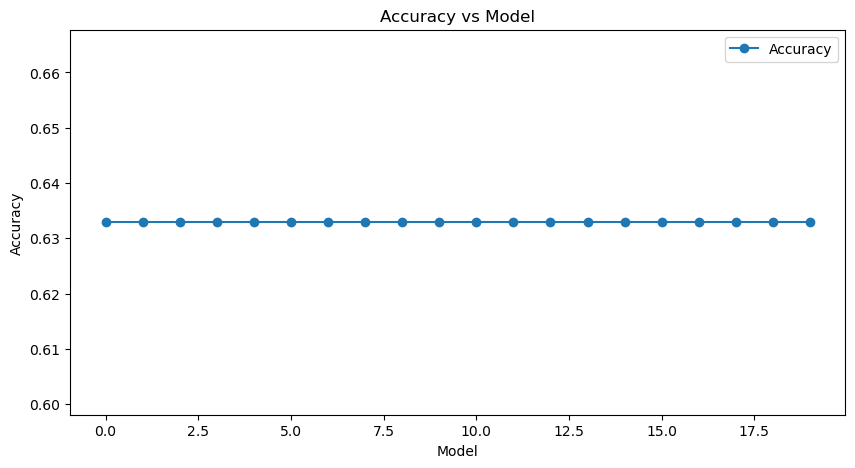

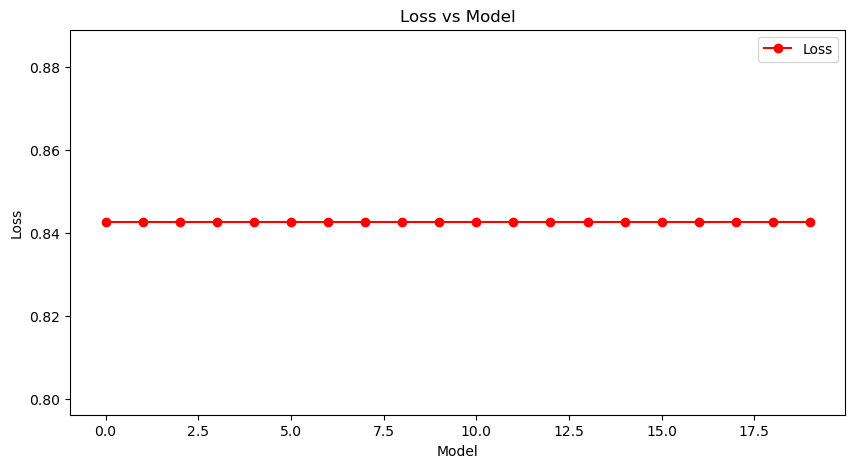

In [42]:
import matplotlib.pyplot as plt


# Graficar precisión
plt.figure(figsize=(10, 5))
plt.plot(range(len(accuracy_results1)), accuracy_results1, marker='o', label='Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Model')
plt.legend()
plt.show()

# Graficar pérdida
plt.figure(figsize=(10, 5))
plt.plot(range(len(loss_results1)), loss_results1, marker='o', color='r', label='Loss')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Loss vs Model')
plt.legend()
plt.show()

###  En el caso de las capas no parecen que afecten los resultados
Como definiste la cantidad de neuronas para tus capas ocultas? Por medio del logaritmo 

### Variabilidad en Neuronas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de neuronas.
* Eje Y: Precisión y pérdida.

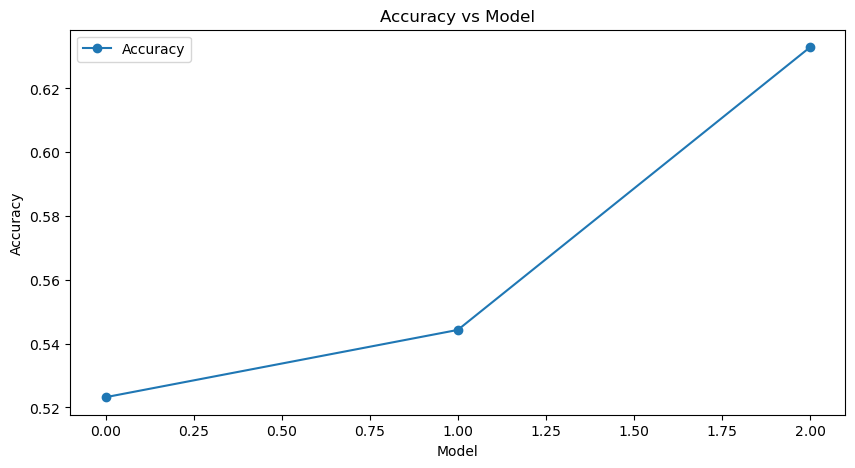

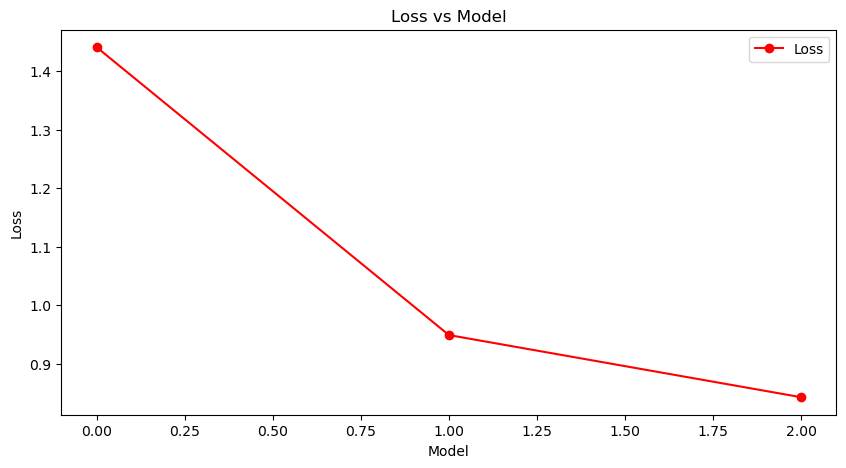

In [41]:
import matplotlib.pyplot as plt


# Graficar precisión
plt.figure(figsize=(10, 5))
plt.plot(range(len(accuracy_results2)), accuracy_results2, marker='o', label='Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Model')
plt.legend()
plt.show()

# Graficar pérdida
plt.figure(figsize=(10, 5))
plt.plot(range(len(loss_results2)), loss_results2, marker='o', color='r', label='Loss')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Loss vs Model')
plt.legend()
plt.show()

###  En el caso de las neuroanas el acuracy se mueve en contra del LOSS 

### Variabilidad en Épocas

Realiza 1 gráfico

* Eje X: Número de épocas.
* Eje Y: Precisión y pérdida.

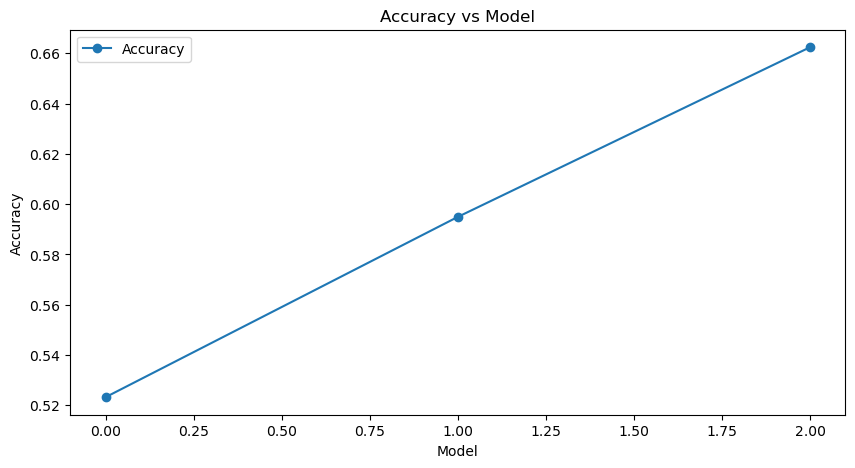

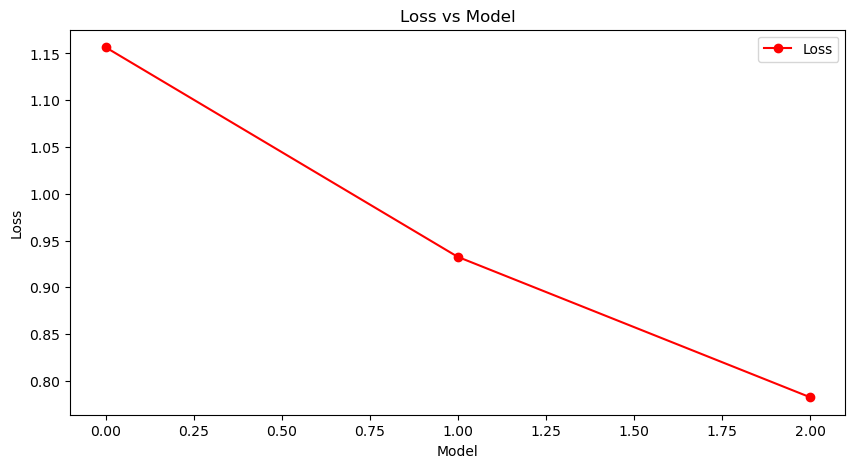

In [36]:
import matplotlib.pyplot as plt

# Código anterior para obtener accuracy_results3 y loss_results3

# Graficar precisión
plt.figure(figsize=(10, 5))
plt.plot(range(len(accuracy_results3)), accuracy_results3, marker='o', label='Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Model')
plt.legend()
plt.show()

# Graficar pérdida
plt.figure(figsize=(10, 5))
plt.plot(range(len(loss_results3)), loss_results3, marker='o', color='r', label='Loss')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Loss vs Model')
plt.legend()
plt.show()


###  En el caso de las epocas se el acuracy se mueve en contra del LOSS 

### Tamaño de Batch:

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.
* Eje X: Tamaño del batch.
* Eje Y: Precisión y pérdida.

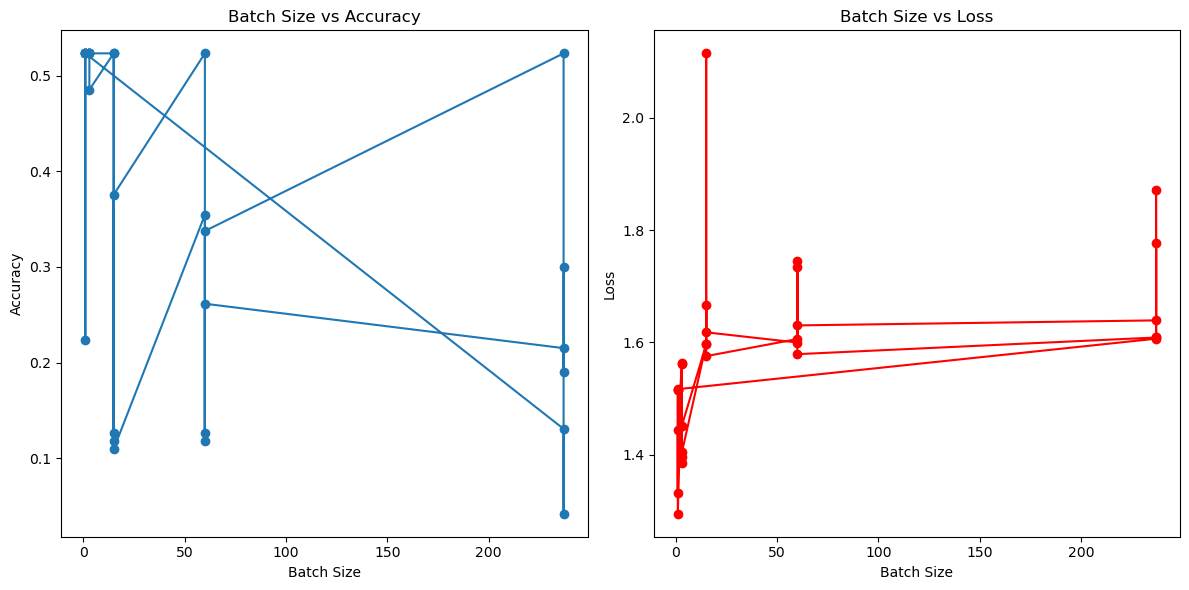

In [34]:
# Create plots
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(batch_size_results, accuracies, marker='o')
plt.title('Batch Size vs Accuracy')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(batch_size_results, losses, marker='o', color='r')
plt.title('Batch Size vs Loss')
plt.xlabel('Batch Size')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

El batch poir si solo tambien tiene compotamientos erraticos.

Conlcuyo que los hiper parametros deben estar calibrados conjuntamnte para que funcione la red neuronal.